In [59]:
import torch
from sklearn.linear_model import LinearRegression
import numpy as np
import os
import string
import matplotlib.pyplot as plt

def load_tensors(task):
    # Construct the file paths
    a_path = f"../tasks/{task}/A_best.pt"
    b_path = f"../tasks/{task}/b_best.pt"
    z_path = f"../tasks/{task}/Z_best.pt"
    z2_path = f"../tasks/{task}/Z2_best.pt"
    #hidden_path = f"../tasks/{task}/hidden_best.pt"
    #hidden2_path = f"../tasks/{task}/hidden_best.pt"

    # Load the tensors
    A = torch.load(a_path)
    b = torch.load(b_path)
    Z = torch.load(z_path)
    Z2 = torch.load(z2_path)
    #hidden = torch.load(hidden_path)
    #hidden2 = torch.load(hidden2_path)
    return A, b, Z, Z2#, hidden, hidden2

def get_data(task_name):
    A, b, Z, Z2 = load_tensors(task_name)
    #Z = np.round(Z); Z2 = np.round(Z2)
    data = torch.load(f"../../tasks/{task_name}/data.pt")
    inputs = data[0].detach().numpy()
    outputs = data[1].detach().numpy()

    if len(data[0].shape) == 2:
        inputs_last = data[0][:,[-1]].detach().numpy()
    else:
        inputs_last = data[0][:,-1].detach().numpy()
    outputs_last = data[1][:,[-1]].detach().numpy()
    return A, b, Z, Z2, inputs, inputs_last, outputs, outputs_last


task_name = "rnn_abs_value_of_diff_numerical"
A, b, Z, Z2, inputs, inputs_last, outputs, outputs_last = get_data(task_name)

In [60]:
Z2

array([[124.04584 ,  49.017094],
       [ 95.03107 ,  32.007698],
       [169.00496 , 112.001785],
       ...,
       [ 87.050354, 119.01399 ],
       [193.03877 , 181.01361 ],
       [ 54.01198 , 185.99454 ]], dtype=float32)

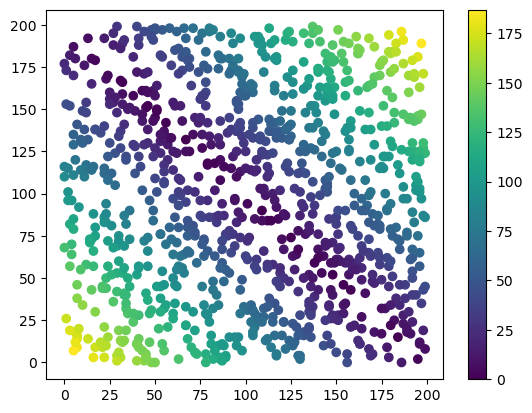

In [61]:
plt.scatter(Z[:batch,0], Z[:batch,1],  c = outputs_last[:batch,0])
plt.colorbar()

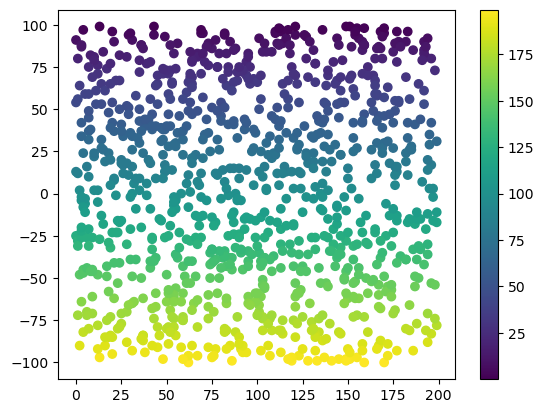

In [67]:
plt.scatter(Z2[:batch,1], inputs_last[:batch,0],  c = Z[:batch,1])
plt.colorbar()

In [45]:
inputs.shape

(900000, 10)

In [38]:
np.concatenate((Z, outputs_last), axis=1)

array([[  1.,  10., -37.],
       [  1.,   6., -61.],
       [  7.,  27.,  68.],
       ...,
       [  6.,  24.,  52.],
       [  0.,   4., -78.],
       [  4.,  10., -34.]], dtype=float32)

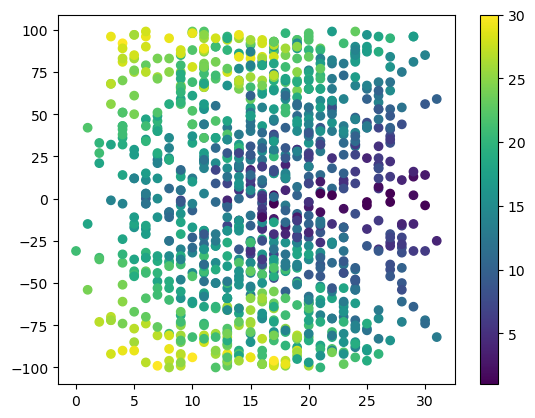

In [29]:
batch = 1000
plt.scatter(Z2[:batch,1], inputs_last[:batch,0], c=Z[:batch,1])
plt.colorbar()

In [23]:
np.concatenate((Z2, inputs_last, Z[:,[1]]), axis=1)

array([[0., 1., 0., 7.],
       [0., 4., 0., 7.],
       [0., 4., 3., 4.],
       ...,
       [1., 2., 1., 6.],
       [0., 1., 7., 0.],
       [0., 6., 0., 7.]], dtype=float32)

/var/folders/6j/b6y80djd4nb5hl73rv3sv8y80000gn/T/ipykernel_81994/427059087.py:15: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


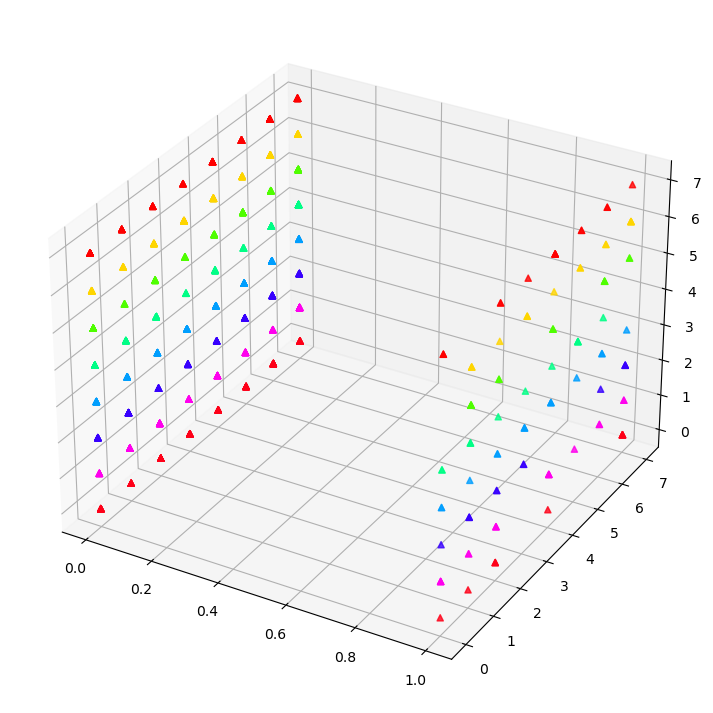

In [18]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating dataset
z = 4 * np.tan(np.random.randint(10, size =(500))) + np.random.randint(100, size =(500))
x = 4 * np.cos(z) + np.random.normal(size = 500)
y = 4 * np.sin(z) + 4 * np.random.normal(size = 500)
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(Z2[:batch,0], Z2[:batch,1], inputs_last[:batch,0],
                    alpha = 0.8,
                    c = Z[:batch,1], 
                    cmap = my_cmap, 
                    marker ='^')

In [7]:
max(Z[:,1])

199.0